# Part 1
Loading the digits dataset:

In [172]:
from sklearn.datasets import load_digits
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

digits_set = load_digits()
data = digits_set.data
target = digits_set.target
digits_df = DataFrame(data=digits_set.data, columns=digits_set.feature_names)
digits_df['digit'] = target


Data:

In [160]:
display(digits_df)
samples, features = digits_df.shape
print(f'This dataset contatins {features} features and {samples} samples.')
print(f"Range of values: [{np.min(data)}, {np.max(data)}]")
print(f"Scale of values: {np.max(data)}")
print(f"Variance: {np.var(data)}")

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


This dataset contatins 65 features and 1797 samples.
Range of values: [0.0, 16.0]
Scale of values: 16.0
Variance: 36.20173240585726


### Wild Guess
It seems like all the data may be integers. Let's check our assumption:

In [161]:
all_integers = np.any(np.mod(data, 1) == 0)
print(f"Our theory is {all_integers}!")

Our theory is True!


We'll use this to our benefit and create an integers dataframe:

In [162]:
digits_df_int = digits_df.astype('Int64')

## Basic Analysis:
- The features names go by 'pixel_i_j' where 0 <= i, j <= 7. 
- This may hint the data represents a 8 x 8 matrix, where each field contains information about it's corresponding pixel.
- All the samples being integers might mean they could correspond to enumerations. As the features named after pixels, we can assume those samples are each pixel's colour.

Let's split our data:

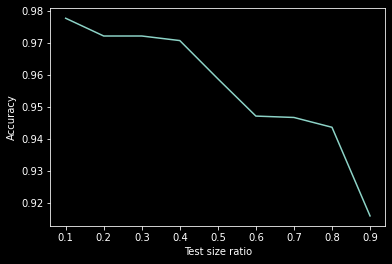

In [163]:
accuracies = []
ratios = np.array([i/10 for i in range(1, 10)])


for r in ratios:
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=r, random_state=42)
    clf = LogisticRegression(max_iter=5000)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)

plt.style.use('dark_background')
plt.plot(ratios, accuracies)
plt.xlabel("Test size ratio")
plt.ylabel("Accuracy")
plt.show()

##### Unbalancing and balancing


In [179]:
samples_per_class = [150, 100, 100, 100, 100, 100, 100, 100, 100, 50]

unbalanced_data = []
for label in range(10):
    indices = np.where(digits_set.target == label)[0]
    subset_size = min(samples_per_class[label], len(indices))
    subset_indices = np.random.choice(indices, size=subset_size, replace=False)
    unbalanced_data.extend(digits_set.data[subset_indices])

unbalanced_data = np.array(unbalanced_data)

unbalanced_target = np.zeros(1000, dtype=np.float64)

unbalanced_target[0:150] = target[0]
for i in range(1, 9):
    unbalanced_target[150 + 100*(i-1) : 250 + 100*(i-1)] = target[i]
unbalanced_target[950:1000] = target[9]

unbalanced_df = DataFrame(data=unbalanced_data, columns=digits_set.feature_names)
unbalanced_df['digit'] = unbalanced_target
display(unbalanced_df)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
0,0.0,0.0,0.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,15.0,3.0,0.0,0.0,0.0
1,0.0,0.0,3.0,14.0,10.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,2.0,15.0,10.0,3.0,0.0,0.0,0.0
2,0.0,0.0,9.0,16.0,11.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,0.0
3,0.0,0.0,7.0,15.0,14.0,8.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0
4,0.0,0.0,10.0,16.0,14.0,2.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,10.0,16.0,14.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,6.0,12.0,14.0,4.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,7.0,13.0,12.0,4.0,0.0,0.0,9.0
996,0.0,0.0,9.0,16.0,11.0,1.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,12.0,16.0,16.0,13.0,3.0,0.0,9.0
997,0.0,0.0,13.0,14.0,9.0,1.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,10.0,16.0,16.0,12.0,0.0,0.0,9.0
998,0.0,0.0,8.0,16.0,13.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,8.0,15.0,16.0,15.0,1.0,0.0,9.0


Now rebalance:

In [166]:
lables = unbalanced_df['digit'].drop_duplicates()
def count_label(df: pd.DataFrame, label: float):
    return len(df[df['digit'] == label])

def min_label(df: pd.DataFrame):
    return min(lables, key=lambda label: count_label(df, label))


def is_balanced(df: pd.DataFrame):
    count = count_label(df, lables[0])
    for label in lables:
        if count_label(df, label) != count:
            return False
    return True
    
rebalanced_df = unbalanced_df.copy()

while not is_balanced(rebalanced_df):
    m_label = min_label(rebalanced_df)
    new_row = unbalanced_df[unbalanced_df['digit'] == m_label].sample()
    rebalanced_df = pd.concat([rebalanced_df, new_row])
    
rebalanced_df.sort_values(by='digit', inplace=True)
display(rebalanced_df)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
0,0.0,0.0,2.0,15.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,12.0,5.0,0.0,0.0,0.0
96,0.0,0.0,7.0,13.0,8.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,8.0,14.0,12.0,3.0,0.0,0.0,0.0
97,0.0,0.0,2.0,14.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,16.0,9.0,1.0,0.0,0.0
98,0.0,0.0,6.0,14.0,13.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,5.0,16.0,6.0,0.0,0.0,0.0,0.0
99,0.0,0.0,4.0,13.0,14.0,8.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,5.0,16.0,14.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,0.0,0.0,5.0,14.0,11.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,6.0,12.0,13.0,9.0,0.0,0.0,9.0
972,0.0,0.0,1.0,9.0,13.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,16.0,6.0,0.0,0.0,9.0
952,0.0,0.0,1.0,11.0,15.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,10.0,15.0,15.0,2.0,0.0,9.0
952,0.0,0.0,1.0,11.0,15.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,10.0,15.0,15.0,2.0,0.0,9.0


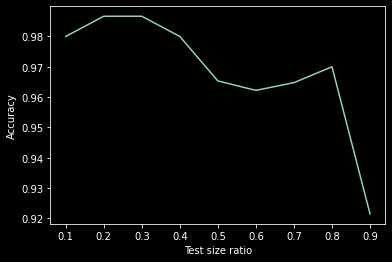

In [176]:
X , y = rebalanced_df.drop('digit', axis=1) , rebalanced_df['digit']
accuracies = []
ratios = np.array([i/10 for i in range(1, 10)])


for r in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r, random_state=42)
    clf = LogisticRegression(max_iter=5000)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)

plt.style.use('dark_background')
plt.plot(ratios, accuracies)
plt.xlabel("Test size ratio")
plt.ylabel("Accuracy")
plt.show()

#### naive k-features selection algorithm

In [167]:
import itertools
import warnings
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning

In [168]:
def k_features_selection(X, y, k):
    best_accuracy = 0
    best_features = ()
    for features in itertools.combinations(X.columns, k):
        X_k_features = X[list(features)]
        X_train, X_test, y_train, y_test = train_test_split(X_k_features, y, test_size=0.2)
        model = LogisticRegression(max_iter=100)
        with warnings.catch_warnings ():
            warnings.simplefilter("ignore", category=ConvergenceWarning) 
            model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        curr_accuracy_score = accuracy_score(y_test, y_pred)
        if curr_accuracy_score > best_accuracy:
            best_accuracy = curr_accuracy_score
            best_features = features
    return best_accuracy, best_features

In [173]:
digits_df_new = digits_df.drop('digit', axis=1)
best_accuracy , best_features = k_features_selection(digits_df_new, target, 2)
print(f'Best accuracy: {best_accuracy} \n')
print(f'Best features for k = 2 : {best_features}')

Best accuracy: 0.44722222222222224 

Best features for k = 2 : ('pixel_0_2', 'pixel_7_5')
